[View in Colaboratory](https://colab.research.google.com/github/RubeAka/CNN_HandWriteNumber/blob/master/CNN_Sample_HandWrittingNumber.ipynb)

# **Preparation**

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [0]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [4]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [5]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [0]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [7]:
x_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

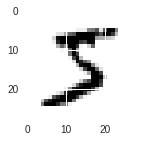

In [8]:
plot_image(x_Train[0])

In [9]:
y_Train[0]

5

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

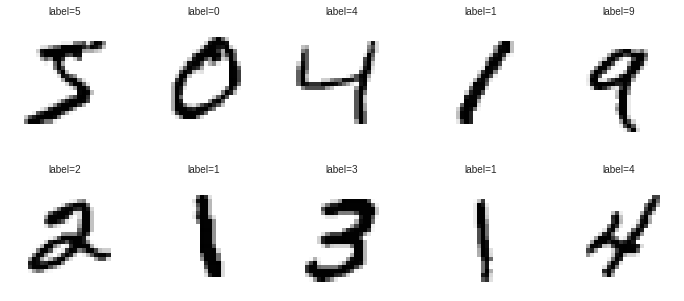

In [11]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

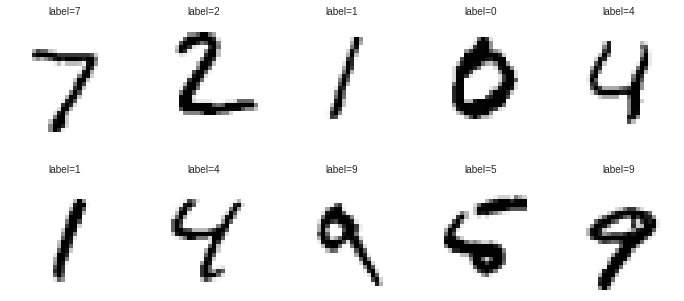

In [12]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10)

In [13]:
x_Train.shape

(60000, 28, 28)

In [0]:
# 多加一個顏色的維度 
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [15]:
x_Train4D.shape

(60000, 28, 28, 1)

In [0]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [0]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [18]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# **Create CNN Model**

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [0]:
model = Sequential()

In [0]:
# Convolution layer 1
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [0]:
# Pooling Layer 1
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
# Convolution layer 2
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [0]:
# Convolution layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

In [0]:
# 平坦化
model.add(Flatten())

In [0]:
model.add(Dense(128, activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
model.add(Dense(10,activation='softmax'))

In [31]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# **Train Model**

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [33]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 68s - loss: 0.4845 - acc: 0.8471 - val_loss: 0.0961 - val_acc: 0.9712
Epoch 2/20
 - 68s - loss: 0.1321 - acc: 0.9610 - val_loss: 0.0631 - val_acc: 0.9800
Epoch 3/20
 - 68s - loss: 0.0984 - acc: 0.9716 - val_loss: 0.0527 - val_acc: 0.9851
Epoch 4/20
 - 68s - loss: 0.0785 - acc: 0.9767 - val_loss: 0.0419 - val_acc: 0.9885
Epoch 5/20
 - 68s - loss: 0.0676 - acc: 0.9803 - val_loss: 0.0399 - val_acc: 0.9882
Epoch 6/20
 - 68s - loss: 0.0572 - acc: 0.9827 - val_loss: 0.0369 - val_acc: 0.9893
Epoch 7/20
 - 67s - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0332 - val_acc: 0.9907
Epoch 8/20
 - 67s - loss: 0.0462 - acc: 0.9860 - val_loss: 0.0345 - val_acc: 0.9905
Epoch 9/20
 - 67s - loss: 0.0434 - acc: 0.9865 - val_loss: 0.0324 - val_acc: 0.9912
Epoch 10/20
 - 67s - loss: 0.0382 - acc: 0.9883 - val_loss: 0.0306 - val_acc: 0.9917
Epoch 11/20
 - 67s - loss: 0.0352 - acc: 0.9887 - val_loss: 0.0315 - val_acc: 0.9918
Epoch 12/20
 - 67s - los

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

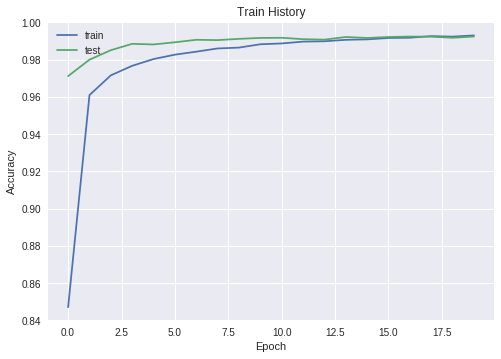

In [35]:
show_train_history('acc','val_acc')

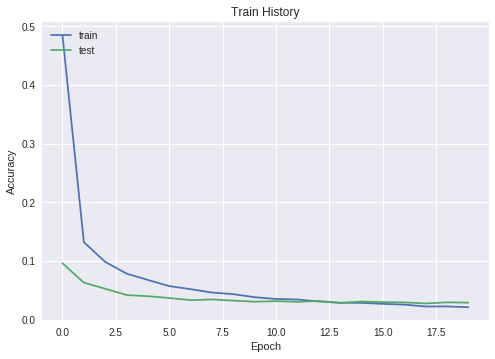

In [36]:
show_train_history('loss','val_loss')

# **Evaluate Accuracy of Model**

In [37]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 6s 615us/step


0.9933

# **Predict**

In [0]:
prediction=model.predict_classes(x_Test4D_normalize)

In [39]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# **Check Prediction Result**

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

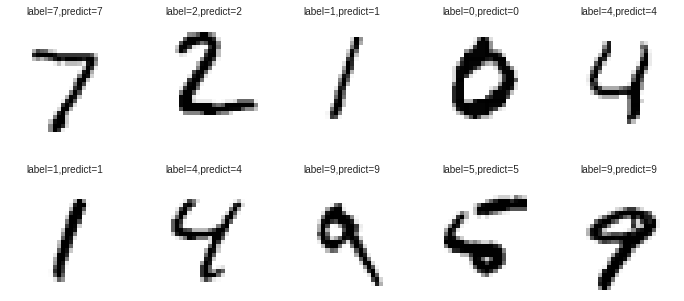

In [41]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# **Confusion Matrix**

In [42]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,1,1,0,0
1,0,1133,1,0,0,0,1,0,0,0
2,1,0,1028,0,0,0,0,2,1,0
3,0,0,1,1002,0,3,0,0,3,1
4,0,0,0,0,977,0,1,0,0,4
5,2,0,0,4,0,884,1,0,0,1
6,5,2,0,0,3,1,945,0,2,0
7,0,2,3,1,0,0,0,1018,1,3
8,2,0,0,0,0,1,0,0,970,1


In [0]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [84]:
target_frame = df[(df.label==9)&(df.predict==4)]
target_frame

,label,predict
1232,9,4
1901,9,4
2293,9,4
2414,9,4
3985,9,4
4823,9,4


In [81]:
target_Indeces = target_frame.index
target_Indeces

Int64Index([1232, 1901, 2293, 2414, 3985, 4823], dtype='int64')

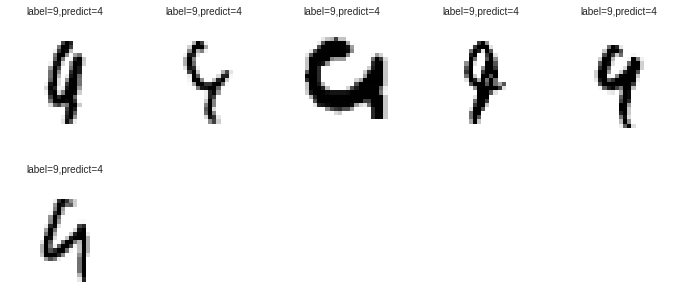

In [82]:
plot_images_labels_prediction(
    [x_Test[i] for i in target_Indeces], 
    [y_Test[i] for i in target_Indeces],
    [prediction[i] for i in target_Indeces],
    idx=0, num = len(target_Indeces))